Análise de séries temporais

In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
mpl.rcParams['figure.figsize'] = [20, 5]

In [3]:
from datetime import datetime
custom_time_parser = lambda x: datetime.strptime(x, "%H:%M:%S.%f").time() if '.' in x else datetime.strptime(x, "%H:%M:%S").time()

In [4]:
df = pd.read_csv('../dataset/case_28_series_train.csv', parse_dates=['Time'], date_parser=custom_time_parser)

In [5]:
df_test = pd.read_csv('../dataset/case_28_series_test.csv', parse_dates=['Time'], date_parser=custom_time_parser)

In [6]:
df_test.size

3348

In [7]:
# df = df[:10000]

In [8]:
df.head()

,Time,EEG,BIS
0,00:00:00,NaN,NaN
1,00:00:01,NaN,NaN
2,00:00:02,NaN,NaN
3,00:00:03,NaN,NaN
4,00:00:04,NaN,NaN


In [9]:
df = df.drop(columns=['BIS'])

In [10]:
df.dtypes

Time     object
EEG     float64
dtype: object

In [11]:
df.Time.dropna()

0       00:00:00
1       00:00:01
2       00:00:02
3       00:00:03
4       00:00:04
          ...   
3341    00:55:41
3342    00:55:42
3343    00:55:43
3344    00:55:44
3345    00:55:45
Name: Time, Length: 3346, dtype: object

In [13]:
df = df.set_index(['Time'])

In [14]:
df.dtypes

EEG    float64
dtype: object

Importar seasonal_decompose para decompor nossa série temporal em tendência, sazonalidade e ruído

In [15]:
!pip show statsmodels

Name: statsmodels
Version: 0.13.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: d:\users\dav\anaconda3\envs\pos\lib\site-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: pmdarima


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [17]:
df

,EEG
Time,
00:00:00,NaN
00:00:01,NaN
00:00:02,NaN
00:00:03,NaN
00:00:04,NaN
...,...
00:55:41,-3.00671
00:55:42,0.01526
00:55:43,-1.99939


In [18]:
# df.index = df.Time

In [19]:
y = df['EEG'].dropna() 
y.head()

Time
00:02:57    12.01160
00:02:58     0.99206
00:02:59     0.01526
00:03:00     0.01526
00:03:01    -1.99939
Name: EEG, dtype: float64

In [20]:
df.isna().sum().sum()

177

In [21]:
df = df.dropna()

In [22]:
resultados = seasonal_decompose(df.EEG.dropna(), period = 1000)

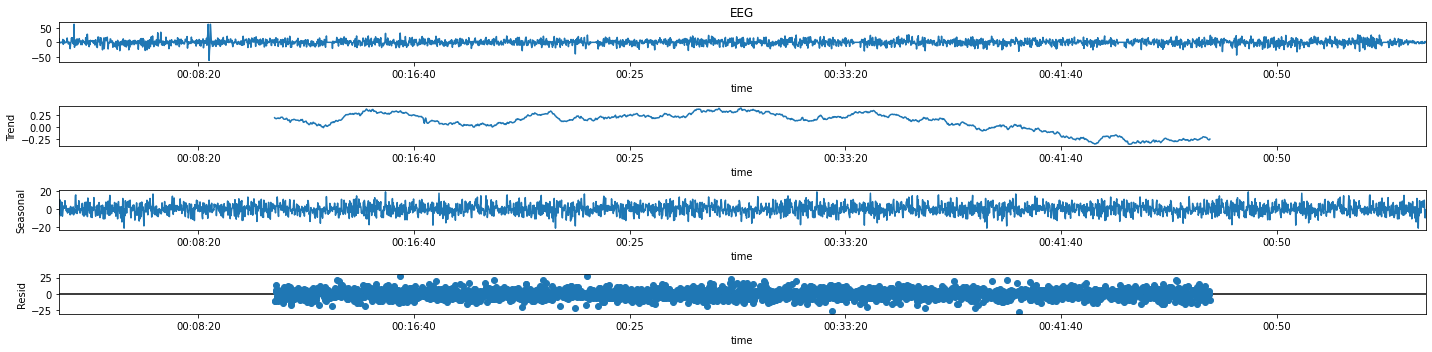

In [23]:
resultados.plot();

In [24]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1, color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    plt.legend(fontsize=18)

In [25]:
# plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red', 'blue', 'green', 'observed', 'trend', 'seasonal')

In [26]:
def plotar_serie(y, cor, label):
    plt.figure(figsize=(20,7))
    plt.plot(y, color=cor, label=label)
    plt.legend(fontsize=18)

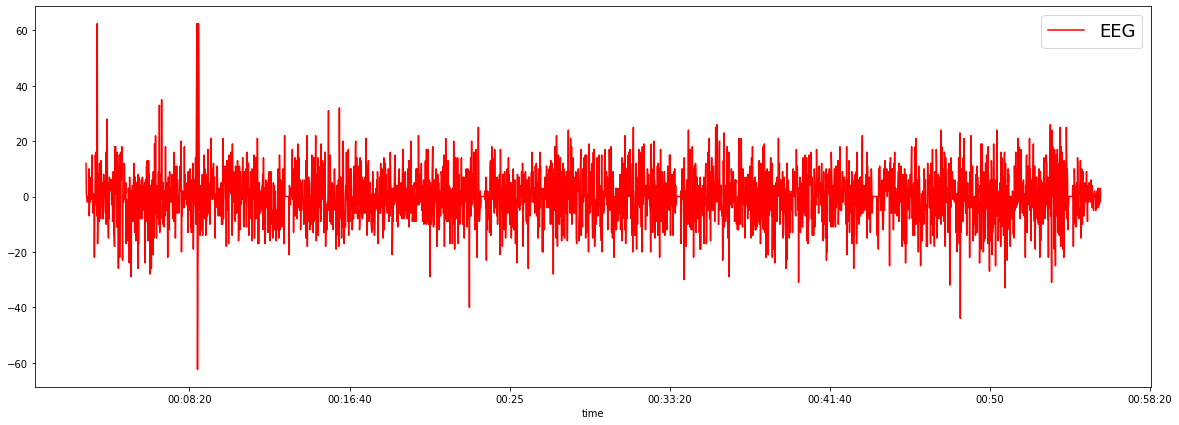

In [27]:
plotar_serie(resultados.observed, 'red', 'EEG')

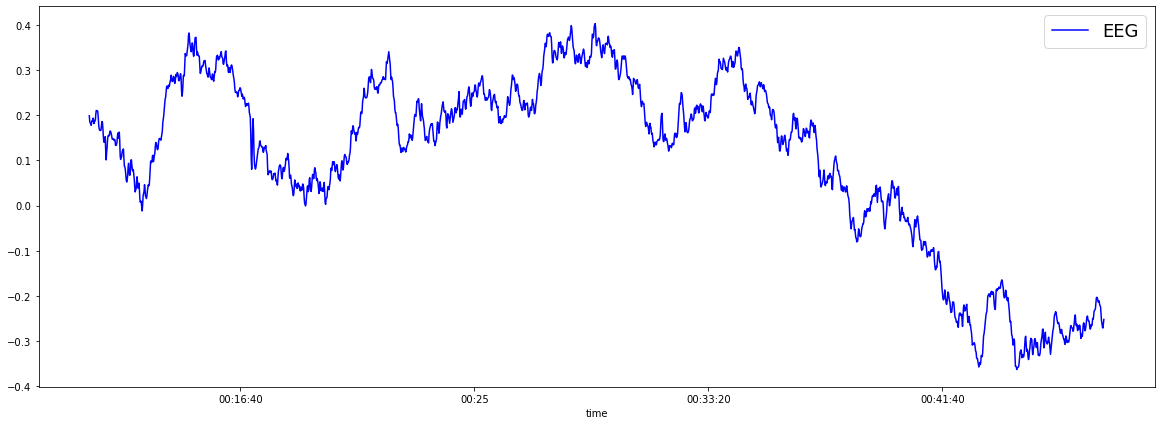

In [28]:
plotar_serie(resultados.trend, 'blue', 'EEG')

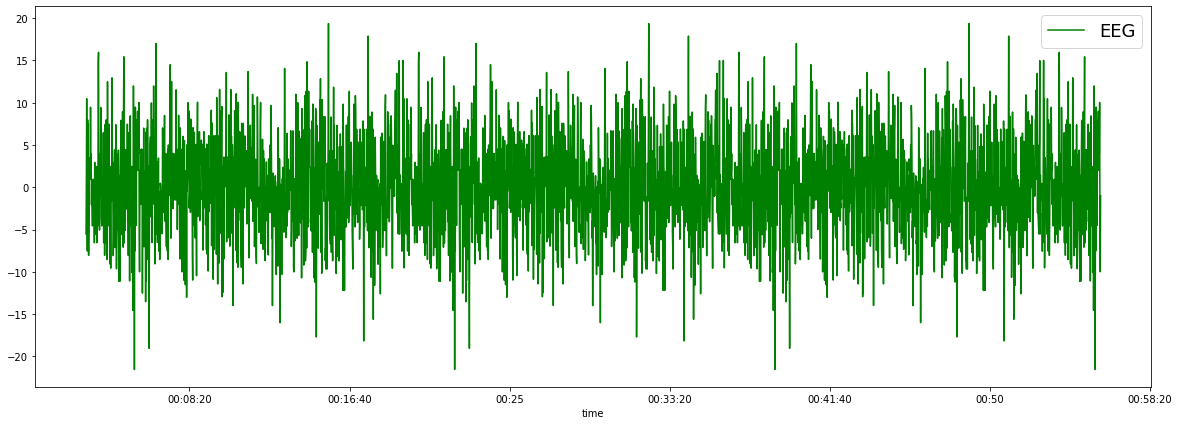

In [29]:
plotar_serie(resultados.seasonal, 'green', 'EEG')

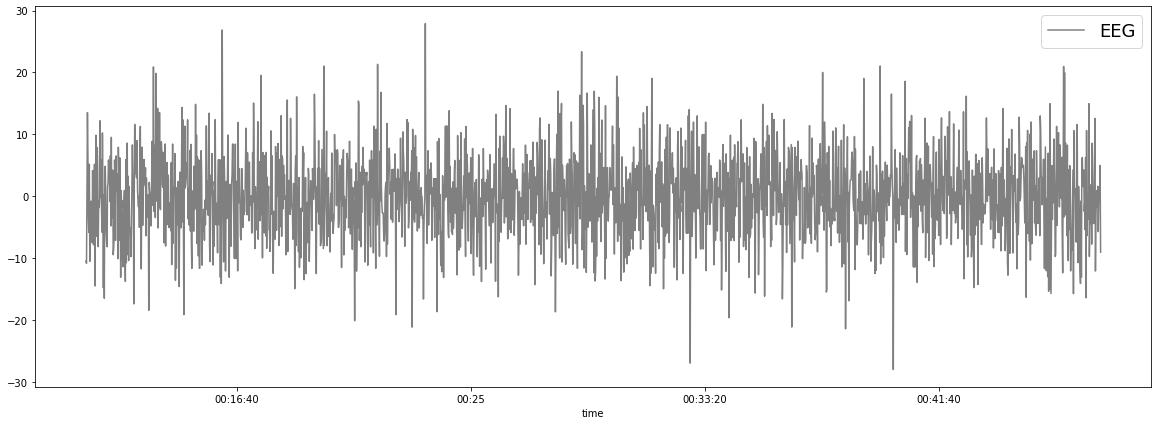

In [30]:
plotar_serie(resultados.resid, 'gray', 'EEG')

Média móvel dos últimos 5 minutos

<AxesSubplot:xlabel='Time'>

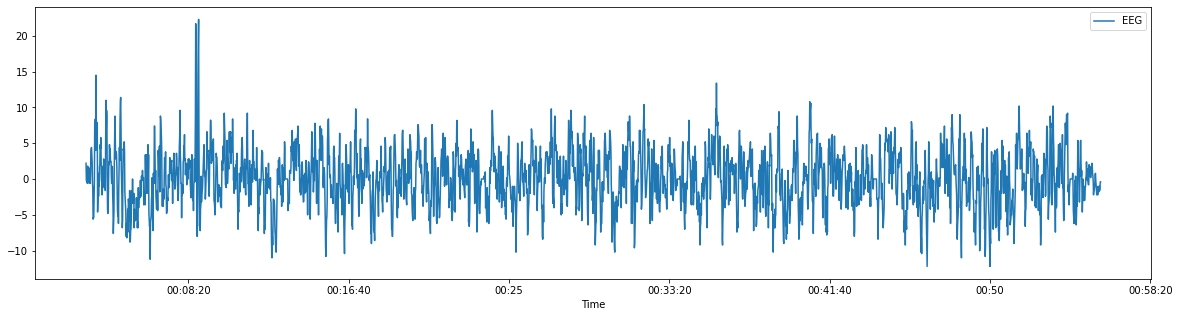

In [31]:
df.rolling(5).mean().plot()

<AxesSubplot:ylabel='Frequency'>

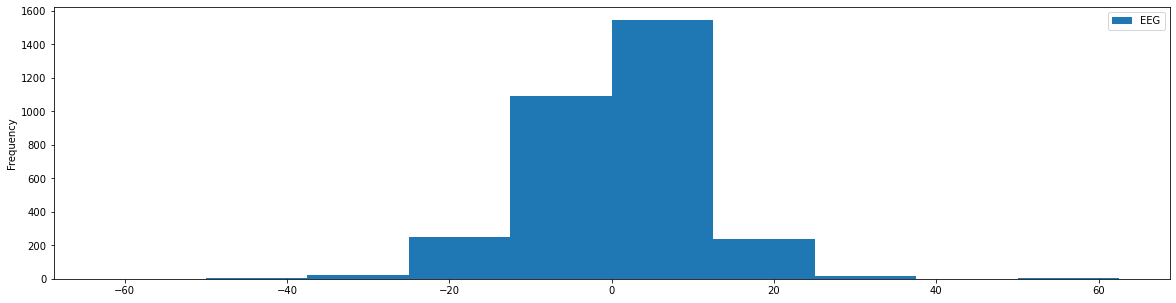

In [32]:
df.plot.hist()

Fazendo o teste para verificar se a série é estacionária

In [33]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
adfuller(y.dropna())

(-31.23727380320001,
 0.0,
 3,
 3165,
 {'1%': -3.432417807760863,
  '5%': -2.862453630885886,
  '10%': -2.5672563467676928},
 22970.178969490546)

In [36]:
dfd1 = df.diff().dropna()

In [37]:
test, pvalue, lags, obs, critic, ic = tsa.stattools.adfuller(dfd1, regression='ct')
print(pvalue)
print(lags)

0.0
29


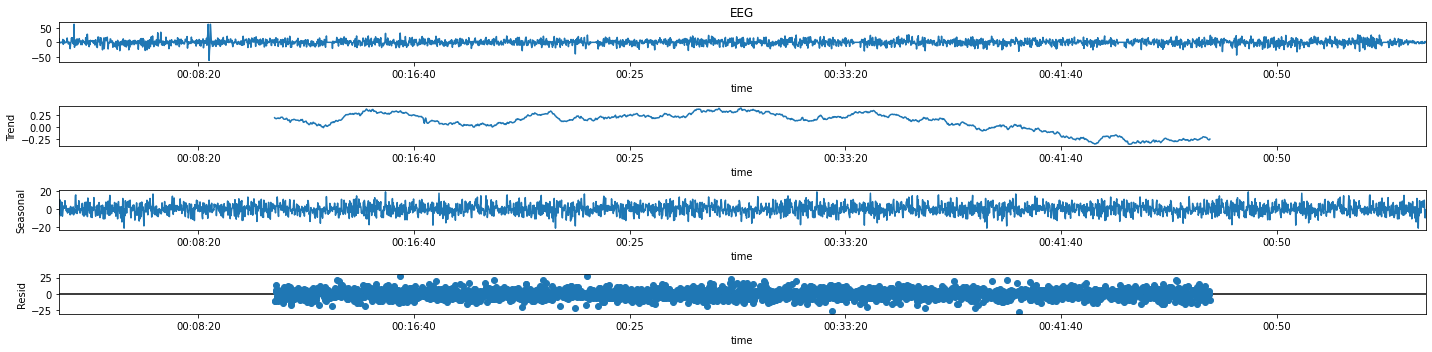

In [43]:
seasonal_decompose(df.EEG.dropna(), period = 1000).plot();

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [45]:
def plotar_acf(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1, title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2, title='1a diff')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3, title='2a diff')

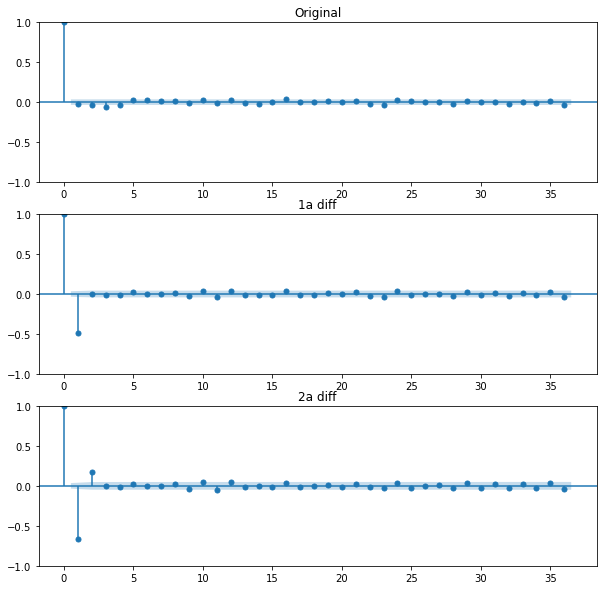

In [46]:
plotar_acf(y, y.diff().dropna(), y.diff().diff().dropna())

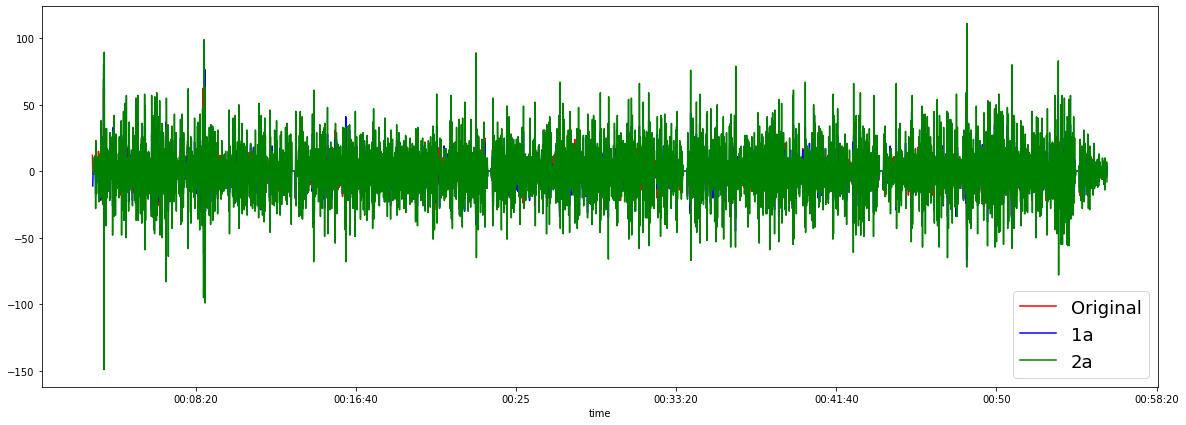

In [47]:
plotar(y, y.diff(), y.diff().diff(), 'red', 'blue', 'green', 'Original', '1a', '2a')

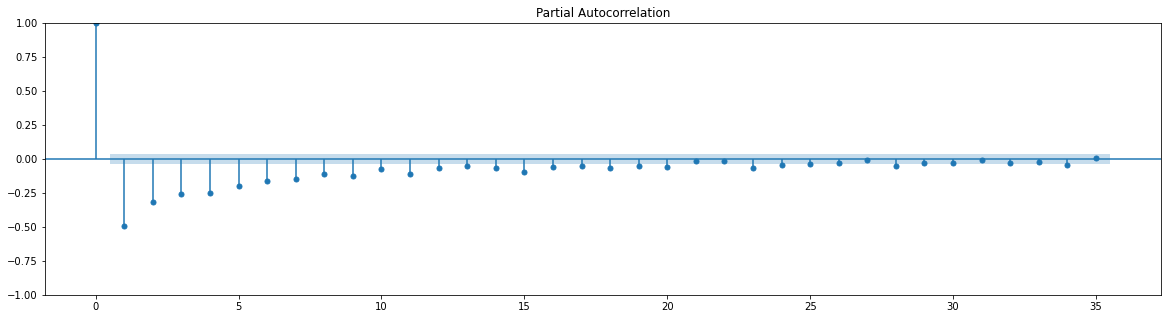

In [48]:
plot_pacf(y.diff().dropna(), lags=35);

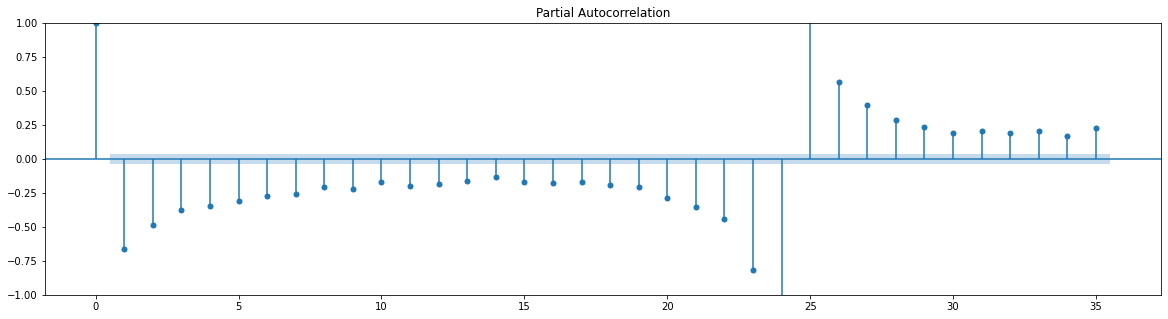

In [49]:
plot_pacf(y.diff().diff().dropna(), lags=35);

Faixa azul é o nível de significância.
Manipular muito os dados pode prejudicar o modelo no futuro

<AxesSubplot:xlabel='Time'>

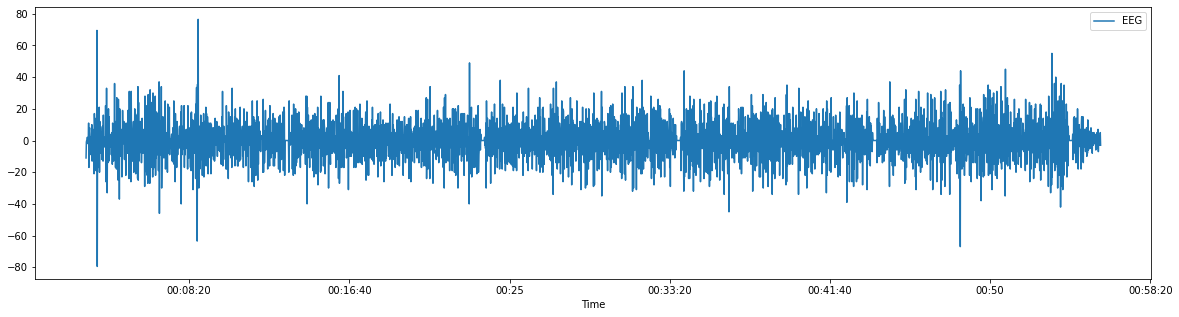

In [50]:
df.diff().plot()

In [51]:
df.shift(1)

,EEG
Time,
00:02:57,NaN
00:02:58,12.01160
00:02:59,0.99206
00:03:00,0.01526
00:03:01,0.01526
...,...
00:55:41,0.01526
00:55:42,-3.00671
00:55:43,0.01526


In [52]:
df.corrwith(df.shift(1))

EEG   -0.021962
dtype: float64

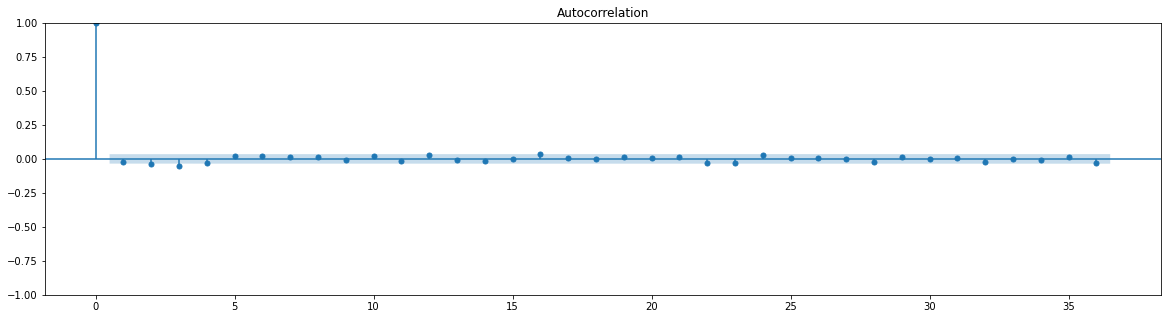

In [53]:
plot_acf(df);

In [54]:
dfd1.corrwith(dfd1.shift(1))

EEG   -0.490944
dtype: float64

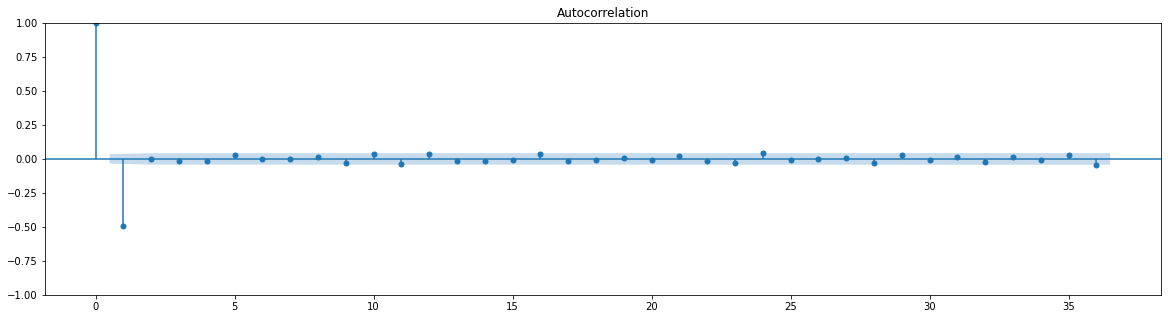

In [55]:
plot_acf(dfd1);

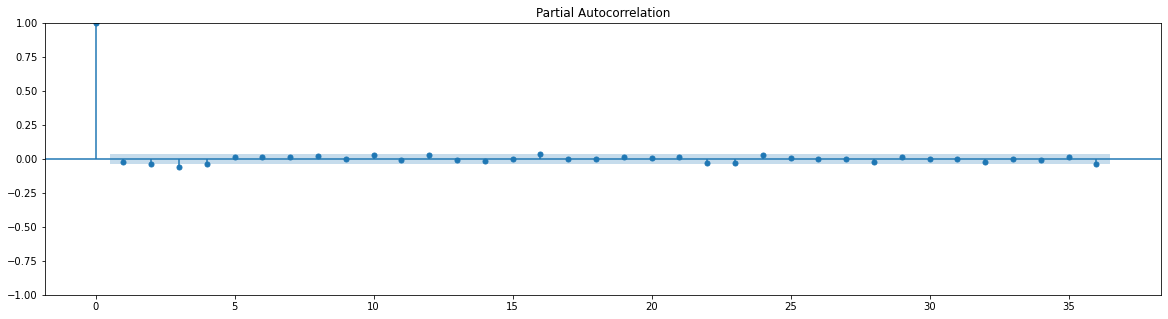

In [57]:
plot_pacf(df);

ARIMA

In [58]:
df_test

,Time,EEG,BIS
0,00:55:46,-3.00671,80.0
1,00:55:47,4.01404,79.0
2,00:55:48,0.99206,78.0
3,00:55:49,0.01526,78.0
4,00:55:50,0.01526,78.0
...,...,...,...
1111,01:14:17,NaN,NaN
1112,01:14:18,NaN,NaN
1113,01:14:19,NaN,NaN
1114,01:14:20,NaN,NaN


In [59]:
df_test = df_test.drop(columns=['BIS'])
df_test

,Time,EEG
0,00:55:46,-3.00671
1,00:55:47,4.01404
2,00:55:48,0.99206
3,00:55:49,0.01526
4,00:55:50,0.01526
...,...,...
1111,01:14:17,NaN
1112,01:14:18,NaN
1113,01:14:19,NaN
1114,01:14:20,NaN


In [60]:
df_model =  ARIMA(dfd1, order=(3,0,0))

d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [61]:
res = df_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    EEG   No. Observations:                 3168
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -12005.603
Date:                Mon, 18 Apr 2022   AIC                          24021.205
Time:                        00:11:34   BIC                          24051.509
Sample:                             0   HQIC                         24032.075
                               - 3168                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.077     -0.015      0.988      -0.153       0.150
ar.L1         -0.7303      0.013    -58.187      0.000      -0.755      -0.706
ar.L2         -0.4868      0.016    -31.353      0.000      -0.517      -0.456
ar.L3         -0.2582      0.013    -19.467      0.000      -0.284      -0.232
sigma2       114.5941      1.904     60.179      0.000     110.862     118.326
===================================================================================
Ljung-Box (L1) (Q):                  13.02   Jarque-Bera (JB):              1660.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.03
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

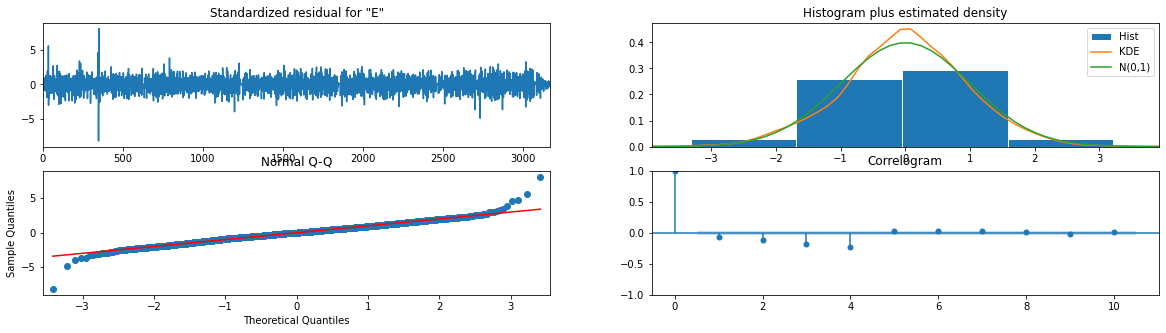

In [62]:
res.plot_diagnostics();

In [63]:
df_test = df_test.dropna()

In [64]:
df_test.size

1888

In [65]:
df_train = df

In [66]:
df_train.size

3169

In [67]:
df_test.size

1888

In [68]:
df_test.dtypes

Time     object
EEG     float64
dtype: object

In [70]:
df_test.index = df_test['Time']
df_test.drop(columns="Time", inplace=True)

In [71]:
df_test.head()

,EEG
Time,
00:55:46,-3.00671
00:55:47,4.01404
00:55:48,0.99206
00:55:49,0.01526
00:55:50,0.01526


In [72]:
res

In [73]:
y_test = df_test['EEG'].dropna() 
y_test.head()

Time
00:55:46   -3.00671
00:55:47    4.01404
00:55:48    0.99206
00:55:49    0.01526
00:55:50    0.01526
Name: EEG, dtype: float64

In [74]:
df_test.dtypes

EEG    float64
dtype: object

In [75]:
y_test.dtypes

dtype('float64')

In [76]:
res2 = res.apply(y_test)

d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [77]:
res2.predict()

Time
00:55:46    -0.001158
00:55:47     1.474396
00:55:48    -1.641883
00:55:49    -1.905111
00:55:50    -1.533592
              ...    
01:11:25     0.903501
01:11:26    -3.264815
01:11:27    33.110531
01:11:28    67.744790
01:11:29    31.602923
Name: predicted_mean, Length: 944, dtype: float64

In [80]:
results_df = pd.concat([res2.predict(),y_test],axis=1)

<AxesSubplot:xlabel='Time'>

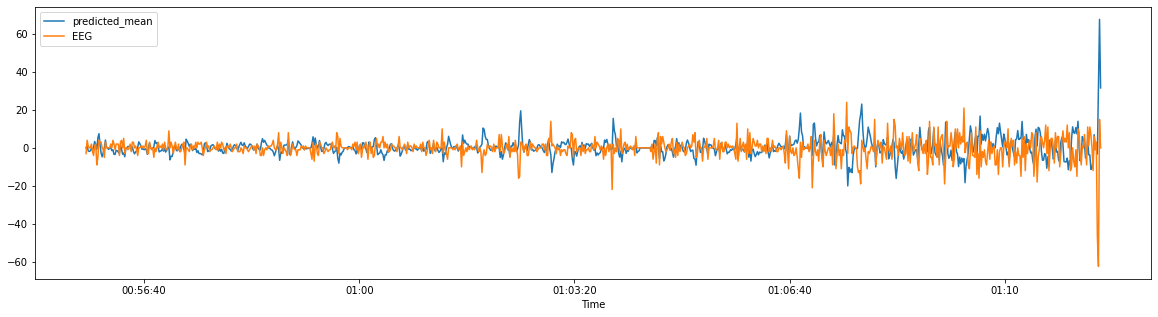

In [82]:
results_df.plot()

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
print('CO2 - AR model Results')
print('r2' ,r2_score(res2.predict(), y_test))
print('mse' ,mean_squared_error(res2.predict(), y_test))
print('mae', mean_absolute_error(res2.predict(), y_test))

CO2 - AR model Results
r2 -1.2253579641498749
mse 56.21406457258802
mae 4.560187947013405


# ARIMA

Junção dos modelos (AR e MA) estatísticos com uma diferenciação.
(Dados e ruídos)

ARIMA (p, d = 1, q = 1)

Para encontrar os parâmetros do ARIMA, precisamos analisar as autocorrelações e autocorrelações parciais

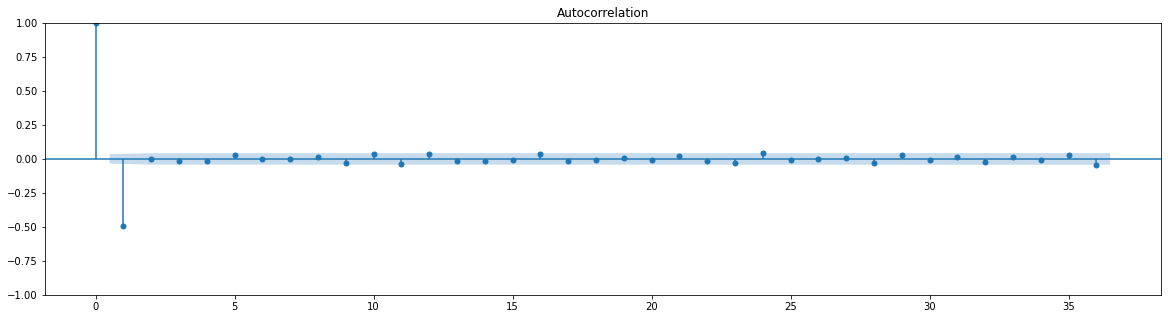

In [93]:
plot_acf(y.diff().dropna());

Mesmo com a 1a diff, vários lags estão acima do nível de significância devido a sazonalidade 

In [94]:
from statsmodels.tsa.arima.model import ARIMA

In [95]:
modelo = ARIMA(y, order=(1,1,1))

d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [96]:
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    EEG   No. Observations:                 3169
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11593.582
Date:                Mon, 18 Apr 2022   AIC                          23193.163
Time:                        00:16:22   BIC                          23211.346
Sample:                             0   HQIC                         23199.685
                               - 3169                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0217      0.014     -1.501      0.133      -0.050       0.007
ma.L1         -0.9996      0.002   -487.342      0.000      -1.004      -0.996
sigma2        88.1469      1.435     61.428      0.0

SARIMA - ARIMA sazonal (P, D, Q)

Usado quando se tem muita sazonalidade

Identificando os parâmetros de forma automática

In [97]:
import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [98]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]

In [99]:
print('Exemplo de combinação de parâmetros para o ARIMA sazonal')
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[2]))

Exemplo de combinação de parâmetros para o ARIMA sazonal
SARIMAX: (0, 0, 0) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (0, 1, 0, 7)


In [100]:
import statsmodels.api as sm

aic_lista = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))


d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ign

In [101]:
aic_lista

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC23189.127508397996',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC23190.333196563555',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC25286.125473476422',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC23178.861242778556',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC23190.363544926677',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC23188.13597258959',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC24451.531450797294',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC23180.205574916836',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC23189.471839903817',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC23190.581136367175',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC25282.29088990608',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC23179.13453064669',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC23190.61558872317',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC23188.501829696375',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC24451.192589228573',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC23180.395392755287',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC25446.460543466703',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC25448.43962725480

In [148]:
mod = sm.tsa.statespace.SARIMAX(y_test, order=(1,1,1), seasonal_order=(1,1,1,7))
results = mod.fit()

d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [149]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               EEG   No. Observations:                  944
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2923.035
Date:                           Mon, 18 Apr 2022   AIC                           5856.070
Time:                                   00:30:05   BIC                           5880.279
Sample:                                        0   HQIC                          5865.301
                                           - 944                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0429      0.016      2.734      0.006       0.012       0.074
ma.L1         -0.9997      0.103     -9.743      0.000      -1.201      -0.799
ar.S.L7       -0.1271      0.033     -3.842      0.000      -0.192      -0.062
ma.S.L7       -0.9998      0.663     -1.507      0.132      -2.300       0.301
sigma2        28.6361     18.792      1.524      0.128      -8.195      65.468
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19929.32
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.64   Skew:                            -2.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

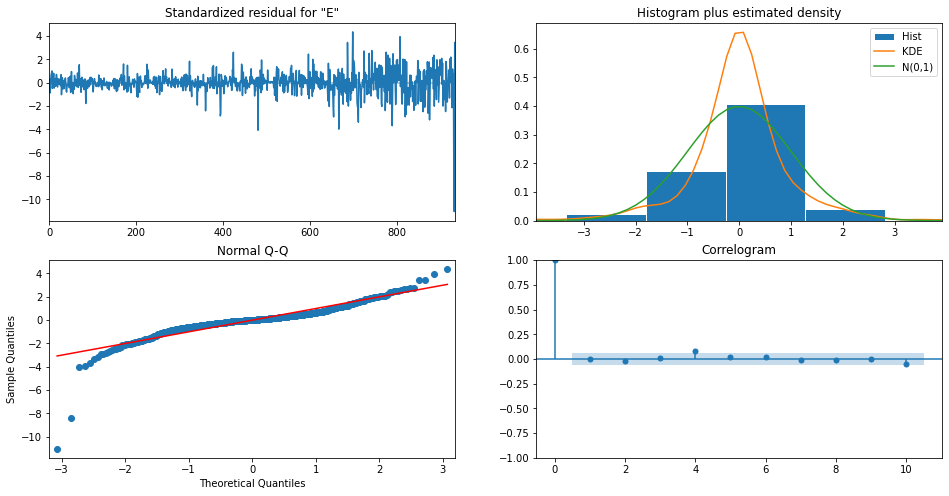

In [150]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [124]:
y_test.index

Index([00:55:46, 00:55:47, 00:55:48, 00:55:49, 00:55:50, 00:55:51, 00:55:52,
       00:55:53, 00:55:54, 00:55:55,
       ...
       01:11:20, 01:11:21, 01:11:22, 01:11:23, 01:11:24, 01:11:25, 01:11:26,
       01:11:27, 01:11:28, 01:11:29],
      dtype='object', name='Time', length=944)

In [125]:
pred = results.get_prediction(start=pd.to_datetime('2022-04-17 00:55:46').time(), dynamic=False)
pred_ic = pred.conf_int()
pred_ic

,lower EEG,upper EEG
Time,,
00:55:46,-2771.894793,2771.894793
00:55:47,-1963.093842,1957.080603
00:55:48,-1956.073599,1964.100842
00:55:49,-1959.094996,1961.079444
00:55:50,-1960.071895,1960.102546
...,...,...
01:11:25,-11.526787,9.556818
01:11:26,-12.375761,8.707737
01:11:27,-13.602966,7.480424


predicted_mean dá a média móvel dessa previsão

iloc[:,0] pega apenas o que está na primeira coluna
iloc[:,1] pega apenas o que está na segunda coluna

In [126]:
pred.predicted_mean

Time
00:55:46    0.000000
00:55:47   -3.006620
00:55:48    4.013621
00:55:49    0.992224
00:55:50    0.015326
              ...   
01:11:25   -0.984985
01:11:26   -1.834012
01:11:27   -3.061271
01:11:28   -3.631543
01:11:29    1.282662
Name: predicted_mean, Length: 944, dtype: float64

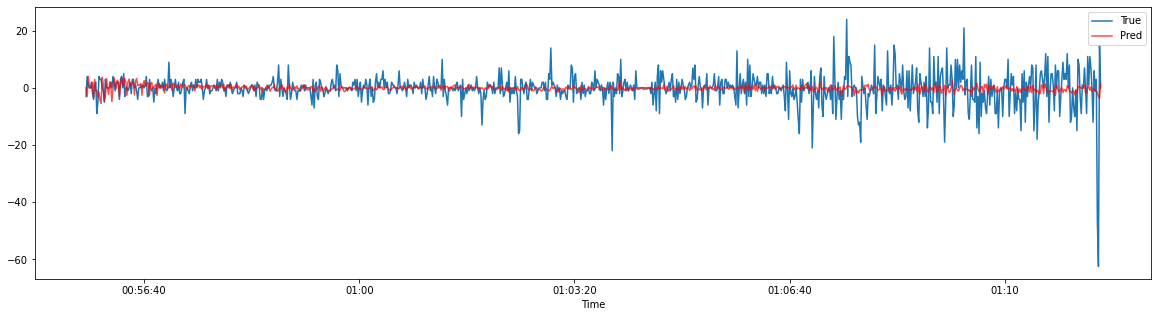

In [156]:
ax = None
y_test.plot(ax=ax, label='True')
ax = pred.predicted_mean.plot(ax=ax, label='Pred', color = 'r', alpha=0.7)
plt.legend()

Steps é o número de dias que quero prever

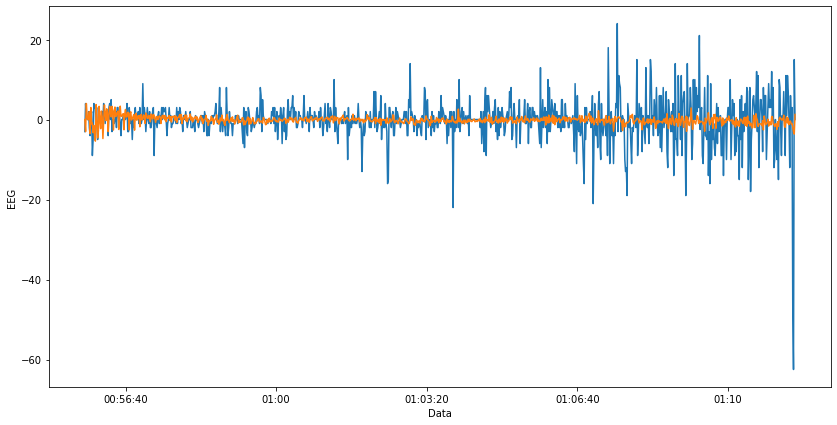

In [128]:
pred_uc = results.get_prediction(steps=10000)
pred_ic = pred_uc.conf_int()
ax = y_test.plot(label='observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')
# ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.5)
ax.set_xlabel('Data')
ax.set_ylabel('EEG')
plt.show()

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [130]:
results = {}

In [157]:
print('MA model Results')
print('r2' , r2_score(pred.predicted_mean, y_test))
print('mse' ,mean_squared_error(pred.predicted_mean, y_test))
print('mae', mean_absolute_error(pred.predicted_mean, y_test))
# modelo_fit['MA'] = {'r2':r2_score(modelo_fit.predict(), df_train),
#                     'mse': mean_squared_error(modelo_fit.predict(), df_train), 
#                     'mae': mean_absolute_error(modelo_fit.predict(), df_train)}

MA model Results
r2 -29.760014158999827
mse 29.22241238926236
mae 3.357089072406653
